In [5]:
import pandas as pd
import numpy as np

from tensorflow.keras import layers, Model, utils
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras.layers import *

In [10]:
from tensorflow.keras.models import *

In [18]:
model = Sequential()
model.add(Reshape((100,100,1),input_shape=(100,100)))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
reshape_5 (Reshape)          (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
activation_9 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2166848   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_11 (Activation)   (None, 1)                 0         
=================================================================
Total params: 2,204,481
Trainable params: 2,204,481
Non-trainable params: 0
_________________________________________________________________

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
activation_9 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)       

In [22]:
l = [(10, '♦️'), (10, '♠️'), (8, '♠️'), (6, '♣️'), (9, '♦️')]

In [31]:
df

,df.groupby('country')['Value'].mean()


In [33]:
df = pd.read_clipboard('\s\s+')
df

,country,Value
0,GBR,10
1,USA,30
2,GBR,20
3,USA,40


In [36]:
df.groupby('country')['Value'].mean()

country
GBR    15
USA    35
Name: Value, dtype: int64

country
GBR    15
USA    35
Name: Value, dtype: int64

In [56]:
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]



<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [101]:
from sklearn.metrics import precision_score, recall_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

precision = precision_score(y_true, y_pred, average='micro')
recall = recall_score(y_true, y_pred, average='micro')
#parameter 'micro' calculates metrics globally by counting the total TP, FN and FP

scores = [precision, recall]
weights = [0.2,0.8]

def weighted_geometric_mean(scores, weights):
    wgm = np.product(np.power(scores, weights))
    return wgm

weighted_geometric_mean(scores, weights)

0.3333333333333333

In [70]:
precision

0.3333333333333333

2.0

In [89]:
np.product(np.power(scores, weights))**(1/sum(weights))

0.3333333333333333

In [84]:
np.power(np.product(np.power(scores, weights)), 1/sum(weights))

0.3333333333333333

In [153]:
from random import choice
from string import digits, punctuation, ascii_letters

password = []
everything = list(digits+punctuation+ascii_letters)

for i in range(10):
    password.append(choice(everything))
password = ''.join(password)
print(password)

^|/X<\Fy7_


In [172]:
def check(password, d=2, p=2):
    num_digits = len([i for i in password if i in digits])
    num_punctuation = len([i for i in password if i in punctuation])
    return num_digits >= d and num_punctuation >= p

print(check('password@123'))
print(check('password@123#'))
print(check('password@123@'))

False
True
True


In [175]:
x = {"x1":1,"x2":2,"x3":3}
y = {"y1":1,"y2":2,"y3":3}
z = {"z1":1,"z2":2,"z3":3}

In [132]:
dict1 = {"x1":1,"y1":1,"z1":1}
dict2 = {"x2":2,"y2":2,"z2":2}
dict3 = {"x3":3,"y3":3,"z3":3}

In [ ]:
dict1, dict2, dict3 = map(dict, zip(x.items(), y.items(), z.items()))

[396.34328252  -3.4768199   17.54815662]
1478993.6985047513


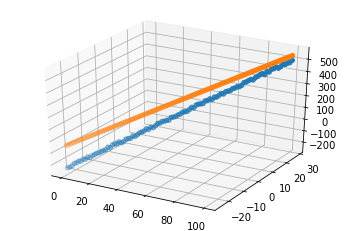

In [315]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# x1 and x2 are variables, x0 is there so that later when X*thetas, i can have theta1 
x0=np.ones(100)
x1=np.linspace(0,100,100)
x2=np.linspace(-25,28,100)

#introduce some noise in the data
fluc=np.random.uniform(-10,10,100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# you can uncommet the +fluc to add noise 20, 2, 10
y = 20 + 2*x1 + 10*x2 + fluc

# this part is to form the X matrix
x = np.array([x0,x1,x2]).T

# calculating using normal equation 
theta=np.linalg.inv(x.T @ x) @ x.T @ y

#use the theta to predict
predicted = x @ theta
print(theta)

#plot
ax.scatter(x1,x2,y)
ax.scatter(x1,x2,predicted)

#show the loss
print(np.sum(np.square(y-predicted)))


plt.show()

In [317]:
df = pd.read_clipboard('\s\s+')
df

,A,B,C,D,E
0,12,4.5,6.1,BUY,NaN
1,12,BUY,BUY,5.6,NaN
2,BUY,4.5,6.1,BUY,NaN
3,12,4.5,6.1,0,NaN


In [331]:
df['score'] = df.apply(lambda x: len(x[x == 'BUY']), axis=1)
print(df)

     A    B    C    D   E  score
0   12  4.5  6.1  BUY NaN      1
1   12  BUY  BUY  5.6 NaN      2
2  BUY  4.5  6.1  BUY NaN      2
3   12  4.5  6.1    0 NaN      0


In [420]:
import numpy as np

array = np.array([[[1, 2], 3], [[4, 5], 6], [[7, 8], 9]])

np.hstack([np.array(tuple(array[:,0])), array[:,1,None]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=object)

array([1])

In [408]:
np.array(array[:,0].tolist()).shape

(3, 2)

In [370]:
np.where(array == np.array([[4, 5],], dtype=object))

(array([], dtype=int64), array([], dtype=int64))

In [391]:
np.array(array[:,0], dtype=int)

ValueError: setting an array element with a sequence.

In [445]:
f = np.vectorize(lambda x: x==[4,5])
idx = np.where(f(array))
idx
(array([1]), array([0]))

(array([1]), array([0]))

In [481]:
np.unravel_index(*np.where([i==[4,5] for i in array.ravel()]), array.shape)

(array([1]), array([0]))